In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [28]:
import seaborn as sns

In [3]:
rawdata = pd.read_csv("dataset.csv")

In [4]:
rawdata.shape

(114000, 21)

In [5]:
rawdata.tail()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
113995,113995,2C3TZjDRiAzdyViavDJ217,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21,384999,False,0.172,0.235,...,-16.393,1,0.0422,0.640,0.928,0.0863,0.0339,125.995,5,world-music
113996,113996,1hIz5L4IB9hN3WRYPOCGPw,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,385000,False,0.174,0.117,...,-18.318,0,0.0401,0.994,0.976,0.1050,0.0350,85.239,4,world-music
113997,113997,6x8ZfSoqDjuNa5SVP5QjvX,Cesária Evora,Best Of,Miss Perfumado,22,271466,False,0.629,0.329,...,-10.895,0,0.0420,0.867,0.000,0.0839,0.7430,132.378,4,world-music
113998,113998,2e6sXL2bYv4bSz6VTdnfLs,Michael W. Smith,Change Your World,Friends,41,283893,False,0.587,0.506,...,-10.889,1,0.0297,0.381,0.000,0.2700,0.4130,135.960,4,world-music
113999,113999,2hETkH7cOfqmz3LqZDHZf5,Cesária Evora,Miss Perfumado,Barbincor,22,241826,False,0.526,0.487,...,-10.204,0,0.0725,0.681,0.000,0.0893,0.7080,79.198,4,world-music


In [6]:
rawdata.columns

Index(['Unnamed: 0', 'track_id', 'artists', 'album_name', 'track_name',
       'popularity', 'duration_ms', 'explicit', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature',
       'track_genre'],
      dtype='object')

In [16]:
#rawdata.drop("Unnamed: 0", axis = 1, inplace=True)
rawdata.columns

Index(['track_id', 'artists', 'album_name', 'track_name', 'popularity',
       'duration_ms', 'explicit', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'time_signature', 'track_genre'],
      dtype='object')

In [19]:
rawdata.isnull().sum()

track_id            0
artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

In [21]:
rawdata.dropna(inplace = True)
rawdata.isnull().sum()

track_id            0
artists             0
album_name          0
track_name          0
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

<Axes: ylabel='danceability'>

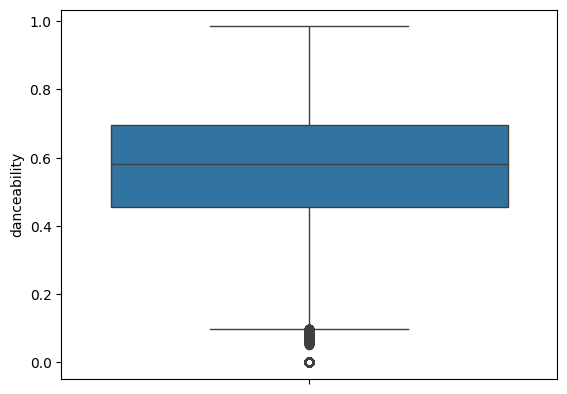

In [31]:
sns.boxplot(rawdata["danceability"])

<Axes: ylabel='danceability'>

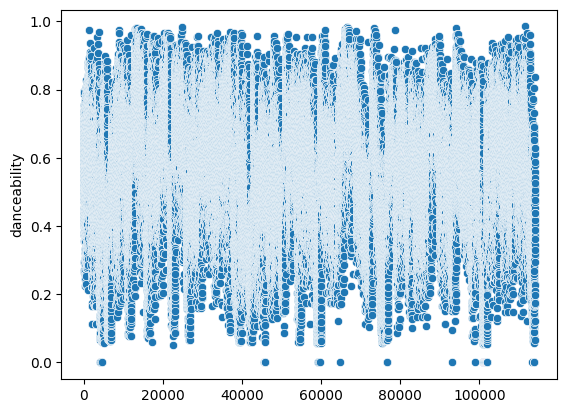

In [32]:
sns.scatterplot(rawdata["danceability"])

In [44]:
rawdata[rawdata['danceability'] < 0.2].shape

(3335, 20)

(25972, 20)

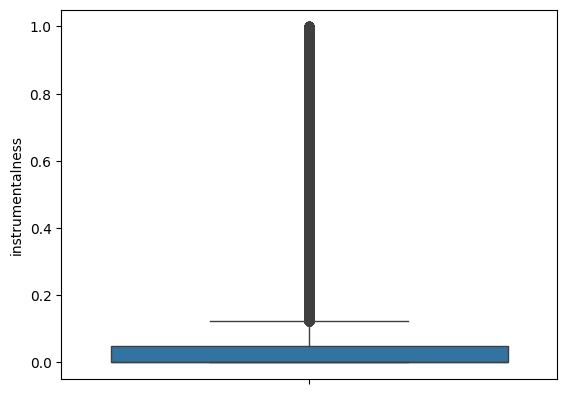

In [46]:
sns.boxplot(rawdata['instrumentalness'])
rawdata[rawdata['instrumentalness'] > 0.1].shape

<Axes: >

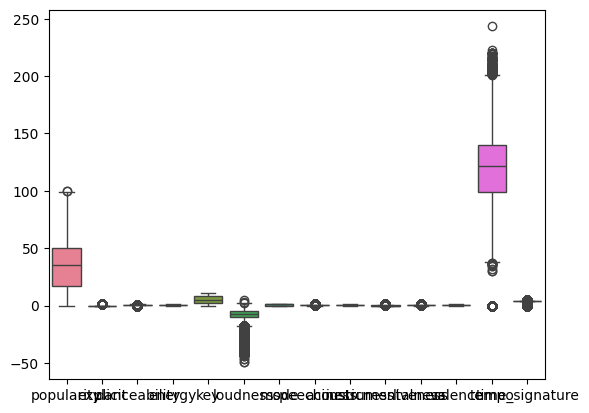

In [48]:
sns.boxplot(rawdata[['popularity', 'explicit', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'time_signature']])

<Axes: >

C:\Users\karan\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\events.py:82: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
C:\Users\karan\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


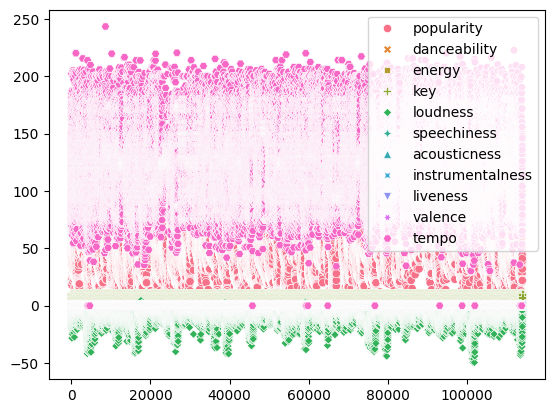

In [50]:
sns.scatterplot(rawdata[['popularity', 'danceability', 'energy', 'key', 'loudness'
                , 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo']])

<Axes: ylabel='tempo'>

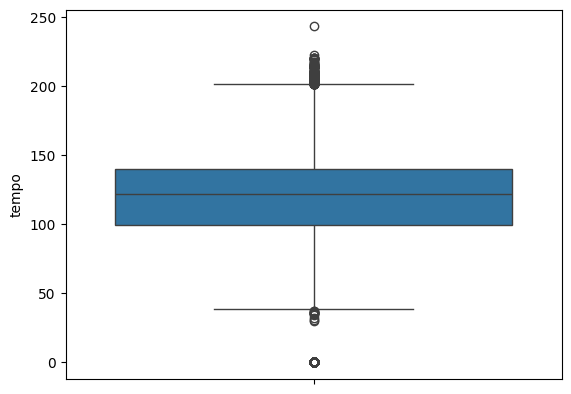

In [51]:
sns.boxplot(rawdata['tempo'])

In [67]:
print(rawdata[rawdata['tempo'] < 50].shape)
rawdata[rawdata['tempo'] > 200].shape

(238, 20)


(580, 20)

In [74]:
rawdata = rawdata.drop(rawdata[rawdata['tempo'] > 200].index)
rawdata = rawdata.drop(rawdata[rawdata['tempo'] < 40].index)
rawdata.shape

(113244, 20)

<Axes: ylabel='speechiness'>

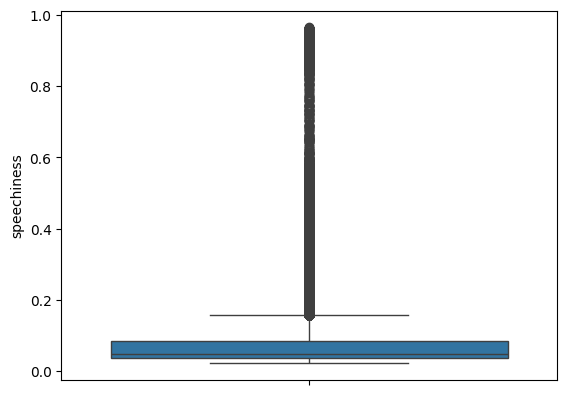

In [130]:
sns.boxplot(rawdata['speechiness'])

In [132]:
rawdata['speechiness'].describe()

count    113244.000000
mean          0.084603
std           0.105544
min           0.022100
25%           0.035900
50%           0.048900
75%           0.084400
max           0.965000
Name: speechiness, dtype: float64

In [111]:
q1 = rawdata['speechiness'].quantile(0.25)
q3 = rawdata['speechiness'].quantile(0.75)
iqr = q3 - q1
iqr, q1, q3

(0.0485, 0.0359, 0.0844)

In [127]:
ll = q1 - 1.5*iqr
ul = q3 + 1.5*iqr
ll, ul

(-0.03685000000000001, 0.15715)

In [128]:
ul_out = rawdata['speechiness'][rawdata['speechiness'] > ul]
ul_out.describe()

count    13090.000000
mean         0.307998
std          0.183258
min          0.158000
25%          0.193000
50%          0.250000
75%          0.340000
max          0.965000
Name: speechiness, dtype: float64

<Axes: ylabel='speechiness'>

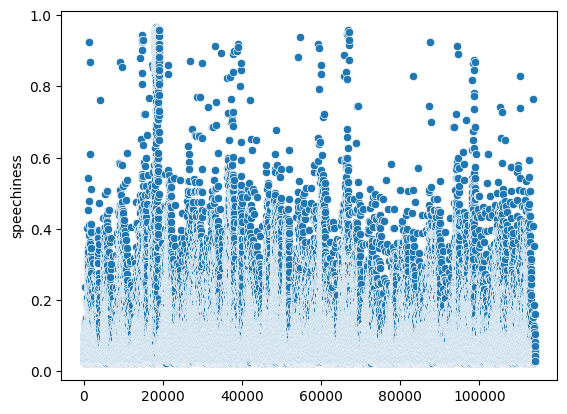

In [105]:
sns.scatterplot(rawdata["speechiness"] )

In [133]:
rawdata.describe()

,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,113244.000000,1.132440e+05,113244.000000,113244.000000,113244.000000,113244.000000,113244.000000,113244.000000,113244.000000,113244.000000,113244.000000,113244.000000,113244.000000,113244.000000
mean,33.249974,2.282563e+05,0.568410,0.642211,5.307981,-8.238571,0.637023,0.084603,0.314404,0.155581,0.213287,0.474495,121.907381,3.910203
std,22.315410,1.064576e+05,0.172107,0.250778,3.559408,4.991241,0.480860,0.105544,0.332349,0.309039,0.190010,0.258858,29.116811,0.407404
min,0.000000,1.580000e+04,0.051300,0.000020,0.000000,-46.591000,0.000000,0.022100,0.000000,0.000000,0.009250,0.000000,41.858000,0.000000
25%,17.000000,1.742830e+05,0.458000,0.473000,2.000000,-10.002000,0.000000,0.035900,0.016800,0.000000,0.098000,0.260000,99.197000,4.000000
50%,35.000000,2.130900e+05,0.581000,0.685000,5.000000,-7.000000,1.000000,0.048900,0.168000,0.000042,0.132000,0.464000,122.002000,4.000000
75%,50.000000,2.617330e+05,0.695000,0.854000,8.000000,-4.997000,1.000000,0.084400,0.597000,0.048500,0.273000,0.683000,140.029000,4.000000
max,100.000000,5.237295e+06,0.985000,1.000000,11.000000,4.532000,1.000000,0.965000,0.996000,1.000000,1.000000,0.995000,199.998000,5.000000


In [135]:
rawdata.to_csv("new_clean_dataset.csv", index= False)